In [1]:
include("../encoding.jl")
include("../plotting.jl")

heatmapplot (generic function with 1 method)

# Proteins

In [2]:
using DelimitedFiles

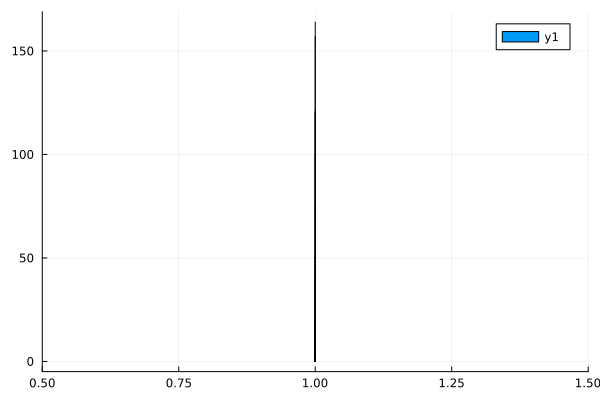

In [3]:
ϕx = readdlm("../proteins_X") .+ 0.04  #a small value is added to account for negative values when computing normalizatin function
y = readdlm("../proteins_y")[:]
umapx = readdlm("../proteins_UMAP");
bounds = 0.1
umapx = (1-2*bounds)*umapx .+bounds # some space at the boundaries for a nicer plot

D = size(ϕx,2)
K = ϕx*ϕx' / D
n = find_normalization(K, n_iter=10)
Δx = ϕx ./ n;

histogram(mean(Δx*Δx'/D, dims=2),xlim=(0.5,1.5))

In [4]:
pos = collect(1:length(y))[y.==1]
pos_observed, pos_unobserved = pos[1:250], pos[250:end]
neg = collect(1:length(y))[y.==-1]
neg_observed, neg_unobserved = neg[1:250], neg[250:end];

In [5]:
pos_test = pos_unobserved
pos23_test = vcat(pos_unobserved, neg_unobserved[1:Int(round(length(neg_observed)/2))])
pos12_test = vcat(pos_unobserved, neg_unobserved)
pos13_test = vcat(neg_unobserved, pos_unobserved[1:Int(round(length(pos_observed)/2))])
neg_test = neg_unobserved;

In [6]:
pos = collect(1:length(y))[y.==1]
neg = collect(1:length(y))[y.==-1];

In [7]:
p = [pos, neg]
p_samples = [pos[1:250],
    vcat(pos[1:250], neg[1:125]),
    vcat(pos[1:250], neg[1:250]),
    vcat(pos[1:125], neg[1:250]),
    neg[250:end-1]
];

In [8]:
[sum(y[proteins].==1) for proteins in p_samples]'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 250  250  250  125  0

In [9]:
[sum(y[proteins].==-1) for proteins in p_samples]'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 0  125  250  250  250

In [10]:
P = reduce(vcat,[sum(Δx[proteins,:],dims=1)/length(proteins) for proteins in p])
P_samples = reduce(vcat,[sum(Δx[proteins,:],dims=1)/length(proteins) for proteins in p_samples])
inv(P*P')*P*P_samples'

2×5 Matrix{Float64}:
 0.992322    0.651967  0.489173  0.328181  0.0153471
 0.00767759  0.348033  0.510826  0.671819  0.984653

In [11]:
i,j=1,1
reduce(hcat,[[sqrt(sum((P[i,:]-P_samples[j,:]).^2)/D) for i in 1:size(P,1)] for j in 1:size(P_samples,1)])

2×5 Matrix{Float64}:
 0.910966  1.03358  1.15167  1.49319  2.04627
 2.04463   1.45002  1.11923  1.02968  0.942752